In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('default') or plt.style.use('default')


In [67]:
# Read in csv files

Sims = ['Init', 'n3E0.5dsdt50Time3405', 'n4E1.8dsdt50Time3405']
SurfElevation = {}

for i in Sims:
    SurfElevation[i] = pd.read_csv('../Simulations/DerwaelSimulations/ElevationDifference/' + str(i) + '/Surface.csv', sep=",")


In [68]:
# Read in grounding line

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

hull_pts = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts[0][i] = hull_pts[0][i]/1000
    hull_pts[1][i] = hull_pts[1][i]/1000


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [69]:
# Define structured grid

xmin, xmax = min(SurfElevation[Sims[0]]['Points:0']), max(SurfElevation[Sims[0]]['Points:0'])
ymin, ymax = min(SurfElevation[Sims[0]]['Points:1']), max(SurfElevation[Sims[0]]['Points:1'])
dist = 100
nx, ny = int((xmax - xmin)/dist + 1), int((ymax - ymin)/dist + 1)
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
grid_x, grid_y = np.meshgrid(x, y)


In [70]:
# Regrid data

Regridded = {}

for i in Sims:
    Regridded[i] = scipy.interpolate.griddata((SurfElevation[i]["Points:0"], SurfElevation[i]["Points:1"]), SurfElevation[i]["Points:2"], (grid_x, grid_y), method='linear')


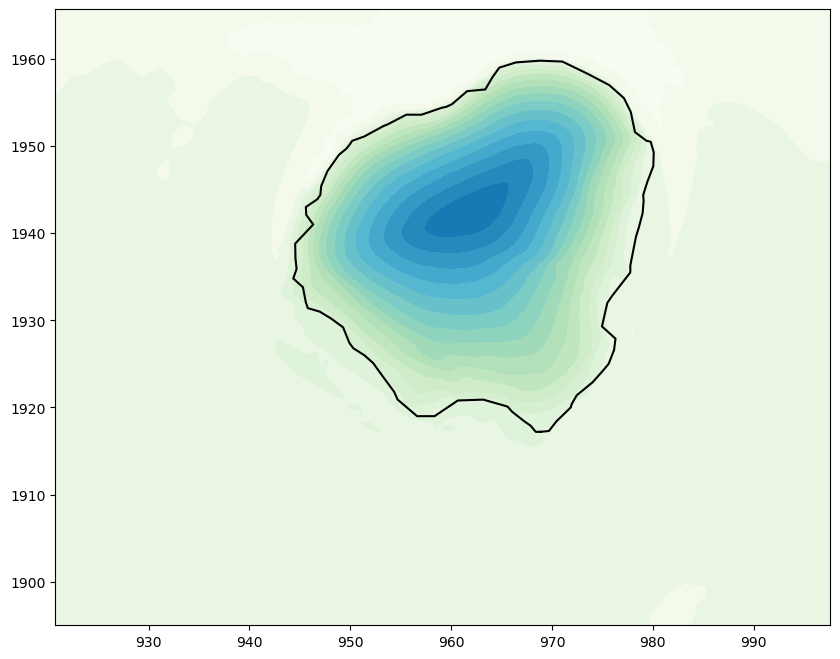

In [71]:
# Plot init elevation

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(hull_pts[0], hull_pts[1], color='black')
CS = ax.contourf(x/1000, y/1000, Regridded[Sims[0]], levels=np.linspace(0.0,500.0,20), cmap="GnBu", extend = 'both')


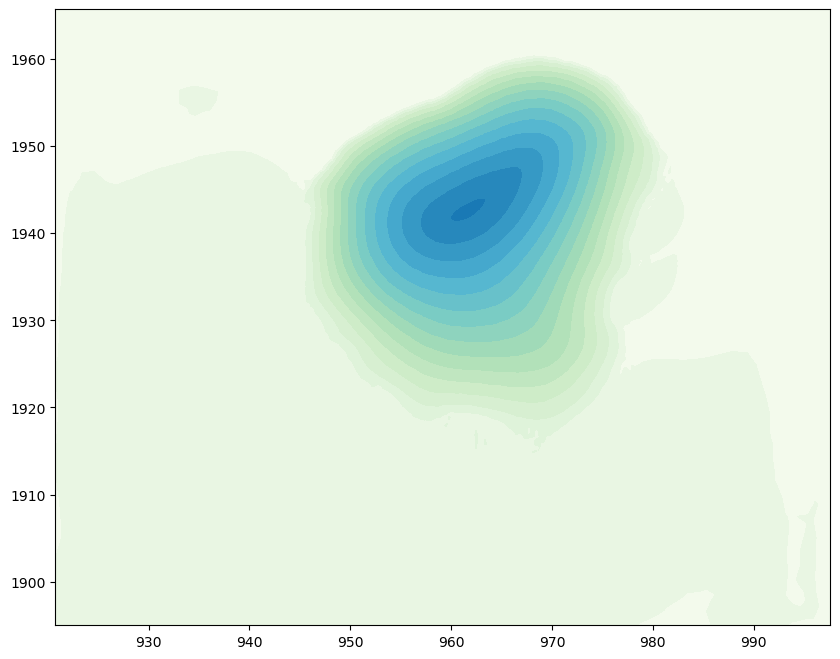

In [72]:
# Plot n3 elevation

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, Regridded[Sims[1]], levels=np.linspace(0.0,500.0,20), cmap="GnBu", extend = 'both')


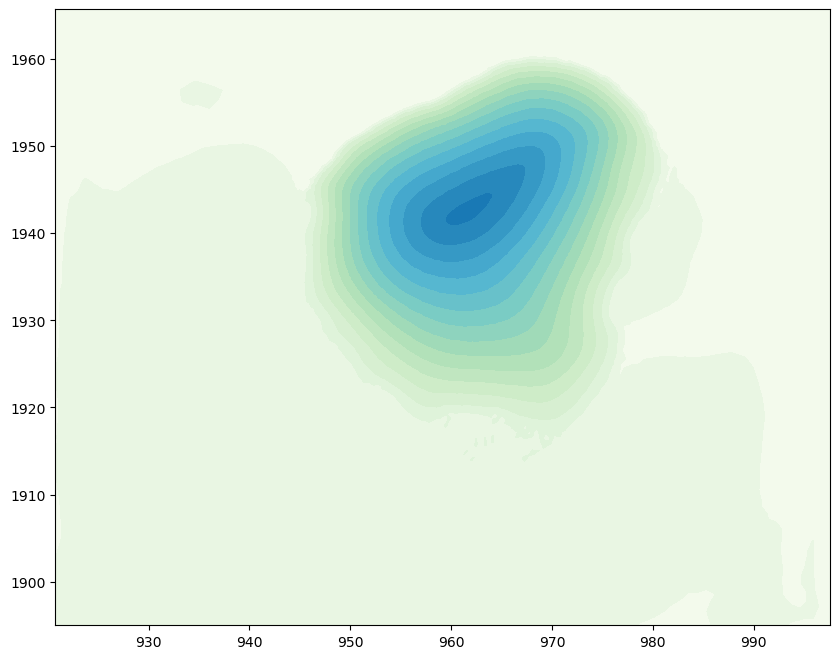

In [73]:
# Plot n4 elevation

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, Regridded[Sims[2]], levels=np.linspace(0.0,500.0,20), cmap="GnBu", extend = 'both')


In [74]:
# Subtract init from n3

diff_n3_init = Regridded[Sims[1]] - Regridded[Sims[0]]
diff_n4_init = Regridded[Sims[2]] - Regridded[Sims[0]]


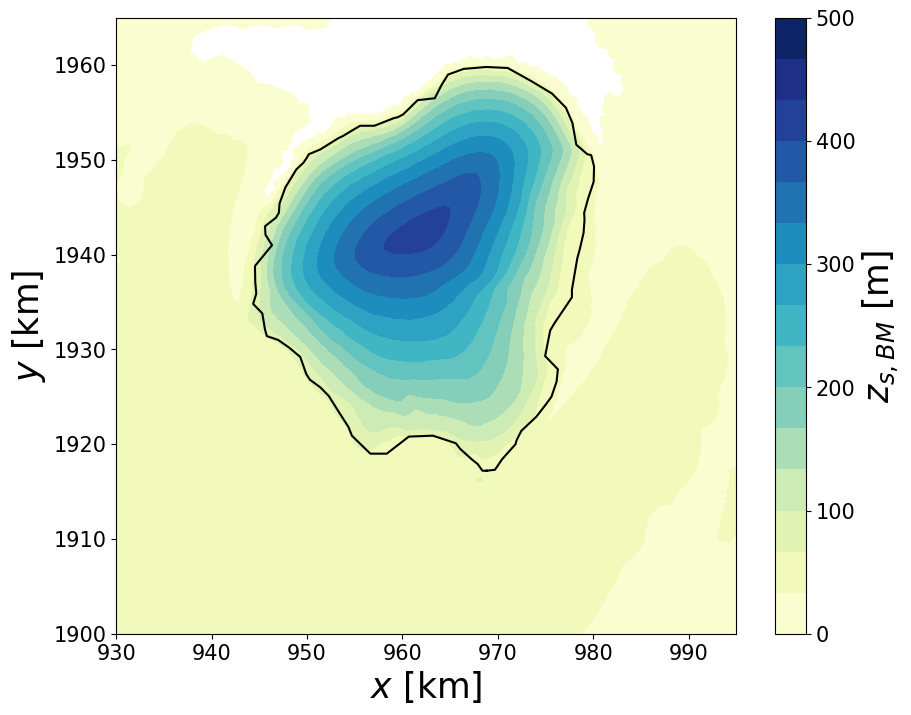

In [84]:
# Plot BM

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
levels = np.linspace(0, 500, 16)
CS = ax.contourf(x/1000, y/1000, Regridded[Sims[0]], levels=levels, vmin=0, vmax=500, cmap='YlGnBu')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0, 100, 200, 300, 400, 500])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$z_{s,BM}$ [m]', rotation=90, size=25)

fig.savefig('../Figures/ElevationBM.jpg', format='jpg', dpi=700, bbox_inches = "tight")


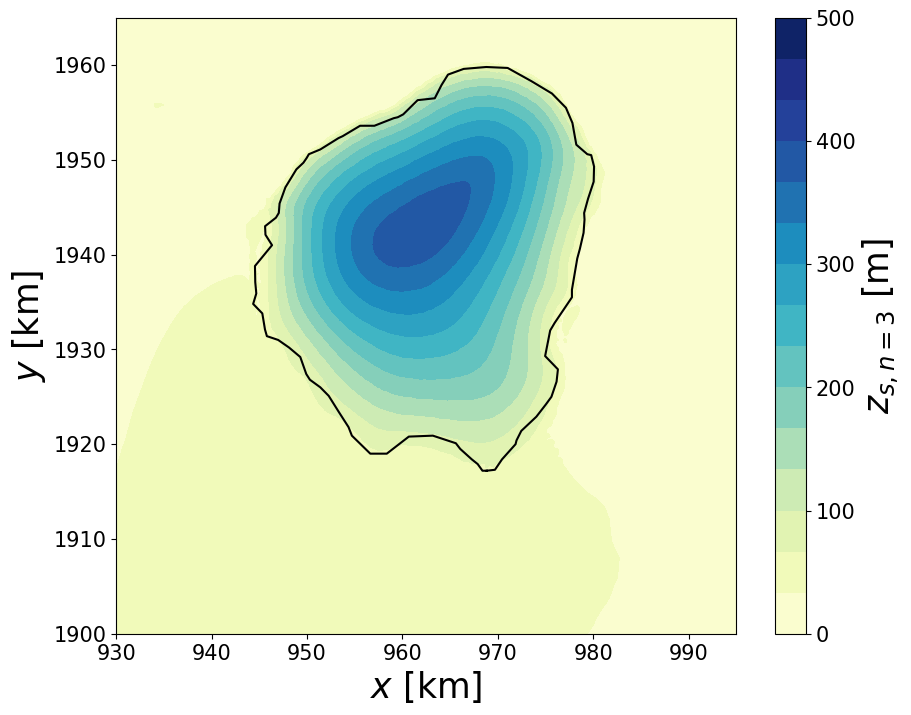

In [85]:
# Plot n3

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
levels = np.linspace(0, 500, 16)
CS = ax.contourf(x/1000, y/1000, Regridded[Sims[1]], levels=levels, vmin=0, vmax=500, cmap='YlGnBu')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0, 100, 200, 300, 400, 500])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$z_{s, n=3}$ [m]', rotation=90, size=25)

fig.savefig('../Figures/Elevation_n3.jpg', format='jpg', dpi=700, bbox_inches = "tight")


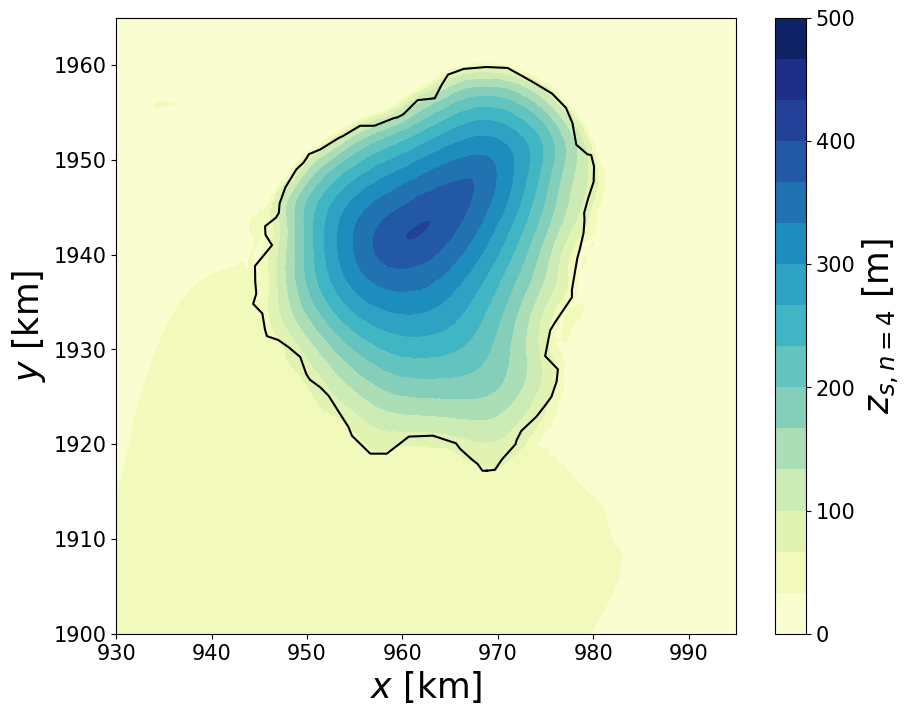

In [86]:
# Plot n4

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
levels = np.linspace(0, 500, 16)
CS = ax.contourf(x/1000, y/1000, Regridded[Sims[2]], levels=levels, cmap='YlGnBu')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0, 100, 200, 300, 400, 500])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$z_{s, n=4}$ [m]', rotation=90, size=25)

fig.savefig('../Figures/Elevation_n4.jpg', format='jpg', dpi=700, bbox_inches = "tight")


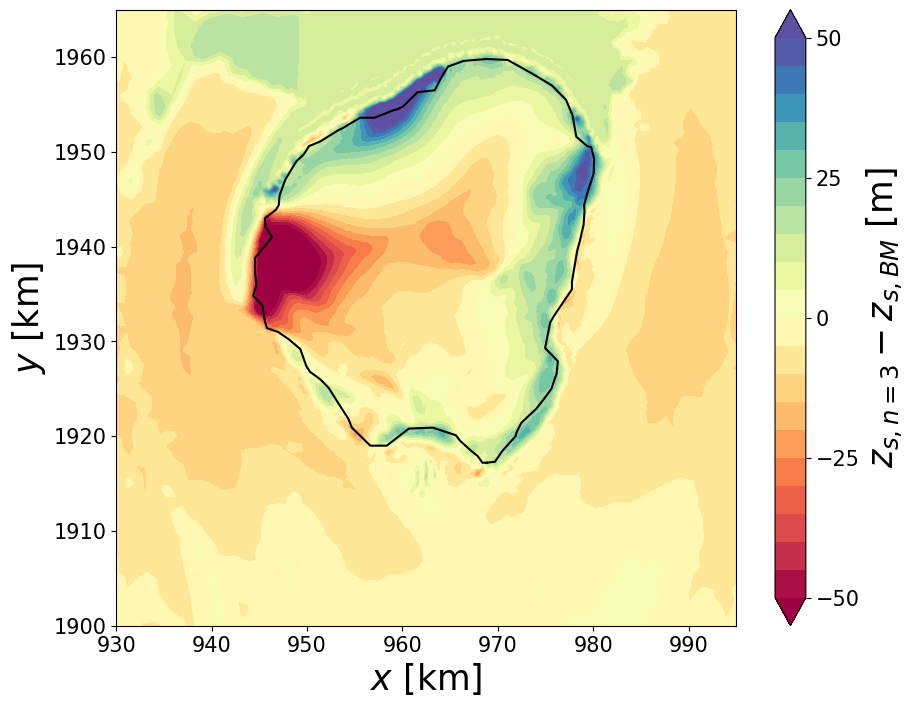

In [78]:
# Plot n3 - BM

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, diff_n3_init, levels=np.linspace(-50.0,50.0,21), cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-50.0, -25.0, 0.0, 25.0, 50.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$z_{s, n=3} - z_{s,BM}$ [m]', rotation=90, size=25)

fig.savefig('../Figures/ElevationDiffn3.jpg', format='jpg', dpi=700, bbox_inches = "tight")


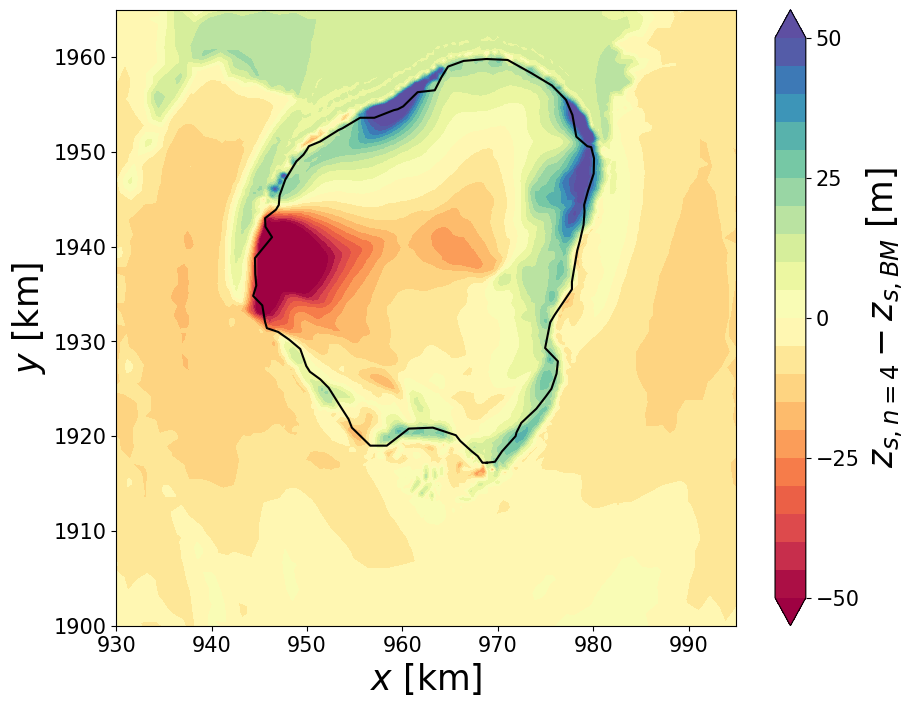

In [79]:
# Plot n3 - BM

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, diff_n4_init, levels=np.linspace(-50.0,50.0,21), cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-50.0, -25.0, 0.0, 25.0, 50.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$z_{s, n=4} - z_{s, BM}$ [m]', rotation=90, size=25)

fig.savefig('../Figures/ElevationDiffn4.jpg', format='jpg', dpi=700, bbox_inches = "tight")


In [80]:
# Substract the n3 difference from the n4 difference

n3_n4_diff = Regridded[Sims[2]] - Regridded[Sims[1]]


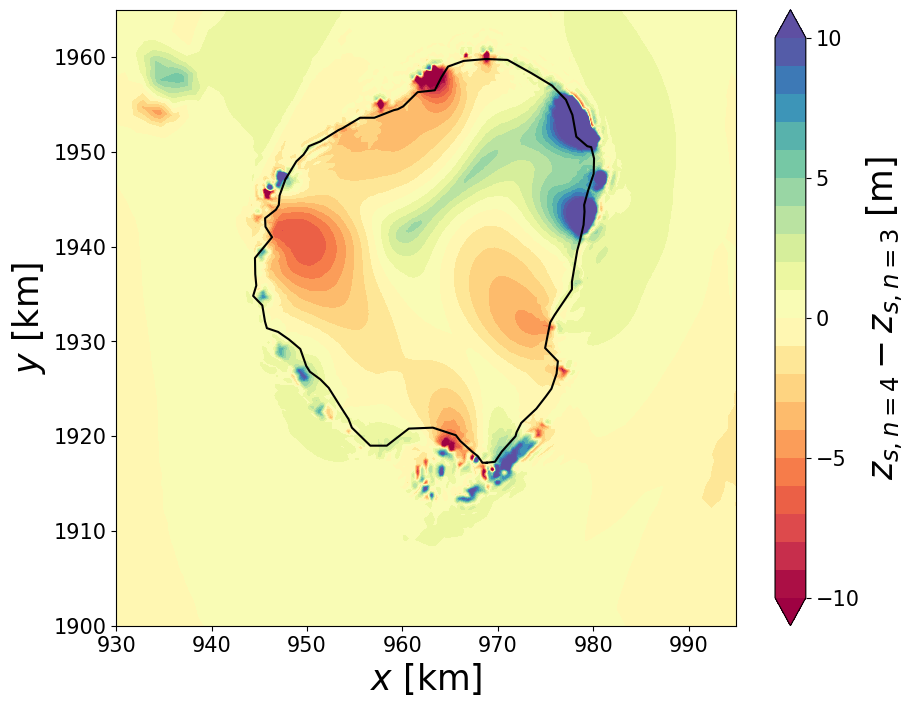

In [81]:
# Plot n4 diff - n3 diff

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, n3_n4_diff, levels=np.linspace(-10.0, 10.0 ,21), cmap="Spectral", extend = 'both')
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.plot(hull_pts[0], hull_pts[1], color='black')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[-10.0, -5.0, 0.0, 5.0, 10.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$z_{s, n=4} - z_{s, n=3}$ [m]', rotation=90, size=25)

fig.savefig('../Figures/DiffElevation_n4_n3.jpg', format='jpg', dpi=700, bbox_inches = "tight")
